In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa import arima_model
from sklearn.metrics import mean_absolute_error
%matplotlib inline

/Users/harshitsrivastava/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Data Pre-Processing

In [57]:
df1 = pd.read_csv("crime-data-by-year/2006_data.out", header = -1, delimiter = "'")
df1[2] = df1[2].str.replace(',', '')
df1[2] = df1[2].str.replace(')', '')
df1[1] = pd.to_datetime(df1[1])
df1 = df1.drop(0, axis=1)
df1.columns = ['Date', 'Incidents']
df1['Incidents'] = df1['Incidents'].astype('int')

df2 = pd.read_csv("crime-data-by-year/2007_data.out", header = -1, delimiter = "'")
df2[2] = df2[2].str.replace(',', '')
df2[2] = df2[2].str.replace(')', '')
df2[1] = pd.to_datetime(df2[1])
df2 = df2.drop(0, axis=1)
df2.columns = ['Date', 'Incidents']
df2['Incidents'] = df2['Incidents'].astype('int')

df3 = pd.read_csv("crime-data-by-year/2008_data.out", header = -1, delimiter = "'")
df3[2] = df3[2].str.replace(',', '')
df3[2] = df3[2].str.replace(')', '')
df3[1] = pd.to_datetime(df3[1])
df3 = df3.drop(0, axis=1)
df3.columns = ['Date', 'Incidents']
df3['Incidents'] = df3['Incidents'].astype('int')

df4 = pd.read_csv("crime-data-by-year/2009_data.out", header = -1, delimiter = "'")
df4[2] = df4[2].str.replace(',', '')
df4[2] = df4[2].str.replace(')', '')
df4[1] = pd.to_datetime(df4[1])
df4 = df4.drop(0, axis=1)
df4.columns = ['Date', 'Incidents']
df4['Incidents'] = df4['Incidents'].astype('int')

df5 = pd.read_csv("crime-data-by-year/2010_data.out", header = -1, delimiter = "'")
df5[2] = df5[2].str.replace(',', '')
df5[2] = df5[2].str.replace(')', '')
df5[1] = pd.to_datetime(df5[1])
df5 = df5.drop(0, axis=1)
df5.columns = ['Date', 'Incidents']
df5['Incidents'] = df5['Incidents'].astype('int')

df6 = pd.read_csv("crime-data-by-year/2011_data.out", header = -1, delimiter = "'")
df6[2] = df6[2].str.replace(',', '')
df6[2] = df6[2].str.replace(')', '')
df6[1] = pd.to_datetime(df6[1])
df6 = df6.drop(0, axis=1)
df6.columns = ['Date', 'Incidents']
df6['Incidents'] = df6['Incidents'].astype('int')

df7 = pd.read_csv("crime-data-by-year/2012_data.out", header = -1, delimiter = "'")
df7[2] = df7[2].str.replace(',', '')
df7[2] = df7[2].str.replace(')', '')
df7[1] = pd.to_datetime(df7[1])
df7 = df7.drop(0, axis=1)
df7.columns = ['Date', 'Incidents']
df7['Incidents'] = df7['Incidents'].astype('int')

df8 = pd.read_csv("crime-data-by-year/2013_data.out", header = -1, delimiter = "'")
df8[2] = df8[2].str.replace(',', '')
df8[2] = df8[2].str.replace(')', '')
df8[1] = pd.to_datetime(df8[1])
df8 = df8.drop(0, axis=1)
df8.columns = ['Date', 'Incidents']
df8['Incidents'] = df8['Incidents'].astype('int')

df9 = pd.read_csv("crime-data-by-year/2014_data.out", header = -1, delimiter = "'")
df9[2] = df9[2].str.replace(',', '')
df9[2] = df9[2].str.replace(')', '')
df9[1] = pd.to_datetime(df9[1])
df9 = df9.drop(0, axis=1)
df9.columns = ['Date', 'Incidents']
df9['Incidents'] = df9['Incidents'].astype('int')

df10 = pd.read_csv("crime-data-by-year/2015_data.out", header = -1, delimiter = "'")
df10[2] = df10[2].str.replace(',', '')
df10[2] = df10[2].str.replace(')', '')
df10[1] = pd.to_datetime(df10[1])
df10 = df10.drop(0, axis=1)
df10.columns = ['Date', 'Incidents']
df10['Incidents'] = df10['Incidents'].astype('int')

df11 = pd.read_csv("crime-data-by-year/2016_data.out", header = -1, delimiter = "'")
df11[2] = df11[2].str.replace(',', '')
df11[2] = df11[2].str.replace(')', '')
df11[1] = pd.to_datetime(df11[1])
df11 = df11.drop(0, axis=1)
df11.columns = ['Date', 'Incidents']
df11['Incidents'] = df11['Incidents'].astype('int')

In [58]:
frames = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11]
df = pd.concat(frames)

df = df.set_index('Date')
df.sort_index(inplace=True)
df['Incidents'] = df['Incidents'].astype('int')

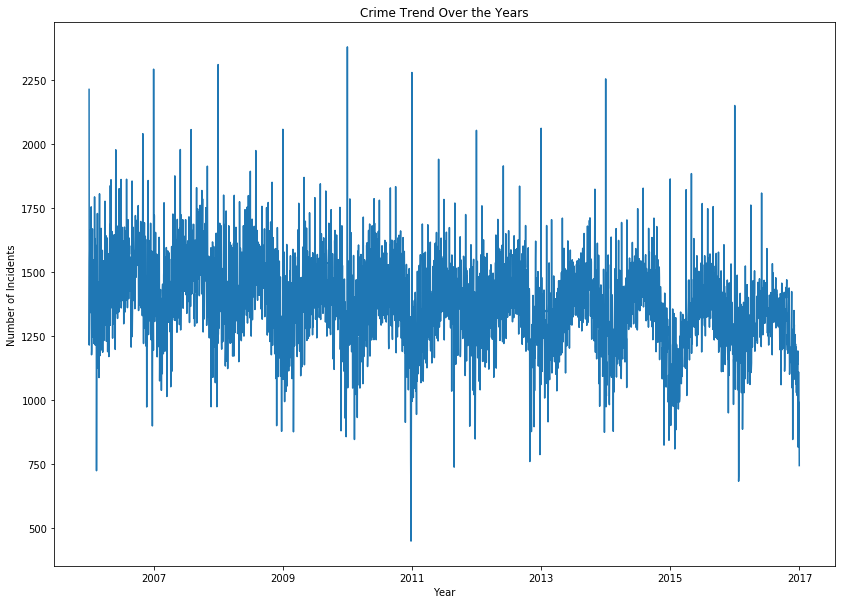

In [59]:
plt.figure(figsize=(14, 10))
plt.plot(df['Incidents'])
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.title('Crime Trend Over the Years')
#plt.xticks(df['Year'])

In [60]:
df['Year'] = np.nan
df['Day_Year'] = np.nan
df['Day_Month'] = np.nan
df['Month'] = np.nan

for i in range(0, len(df.index)):
    df['Year'][i] = df.index[i].year
    
    # Creating new column for storing Day of the Year
    df['Day_Year'][i] = df.index[i].timetuple().tm_yday
    
    # Creating new column for storing Day of the Month
    df['Day_Month'][i] = df.index[i].day
    
    # Creating new column for storing Month
    df['Month'][i] = df.index[i].month
    
df['Year'] = df['Year'].astype('int')
df['Incidents'] = df['Incidents'].astype('int')


# Preparing the 2016 data
df11 = df11.set_index('Date')
df11.sort_index(inplace=True)


/Users/harshitsrivastava/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/harshitsrivastava/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/harshitsrivastava/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/Users/

### Average Incident count of a single day

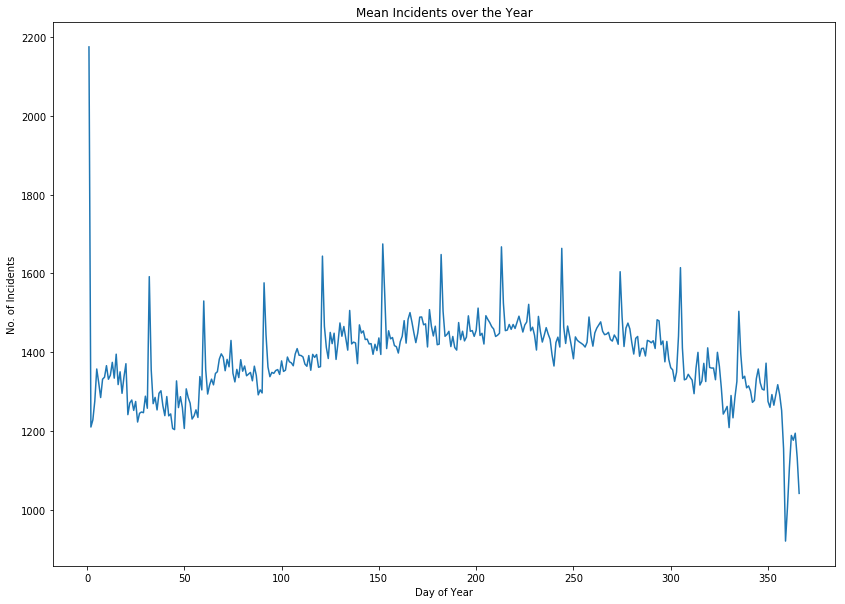

In [62]:
day = df.groupby(['Day_Year'])['Incidents'].mean()

plt.figure(figsize=(14, 10))
plt.title("Mean Incidents over the Year")
plt.plot(day)
plt.ylabel("No. of Incidents")
plt.xlabel("Day of Year")
#plt.xticks(df.index)

# Time-Series Forecasting

/Users/harshitsrivastava/anaconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


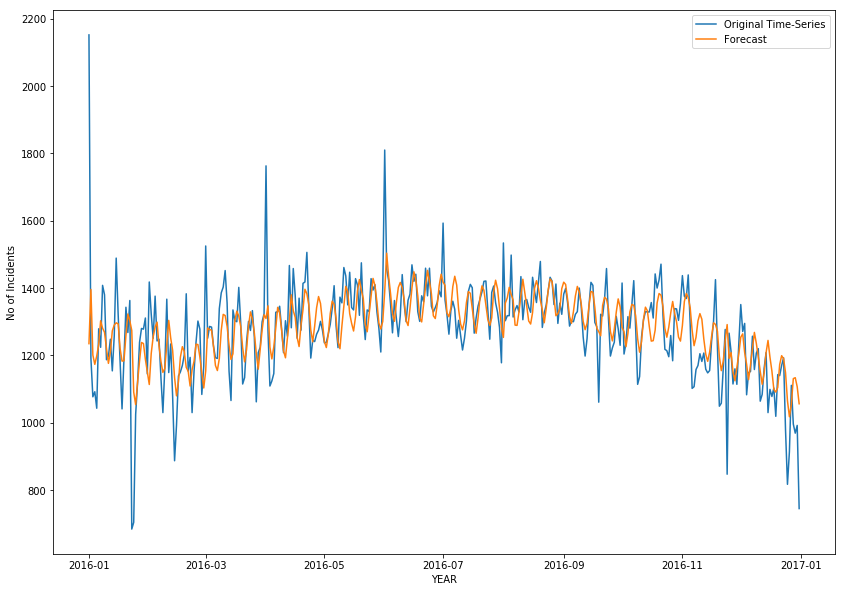

In [38]:
# Using the ARIMA model from statsmodels.tsa library of Python

# Using p=5 and q=3, building the ARMA model
npdf = df['Incidents'].astype(float)
results = arima_model.ARMA(npdf,(5, 3)).fit()

# Forecasting using the ARMA model defined above
forecast = results.predict(start='2016-01-01', end='2016-12-31', dynamic= False) 

# Plotting the forecast along with the actual data
plt.figure(figsize=(14, 10))
plt.plot(df11['Incidents'], label = 'Original Time-Series')
plt.plot(forecast, label = 'Forecast')
plt.xlabel('YEAR')
plt.ylabel('No of Incidents')
plt.legend()
plt.show()

### Mean Absolute Error and Mean Forecast Error

In [39]:
# Creating Series of Actual Values
N_Strikes = df['Incidents']
N_Strikes_sub = N_Strikes.loc['2016-01-01': '2016-12-31']

# Mean Absolute Error
MAE = mean_absolute_error(N_Strikes_sub, forecast)
print ("Mean Absolute Error (MAE): {}".format(MAE))

# Mean Forecast Error
forecast_error = [N_Strikes_sub[i]-forecast[i] for i in range(len(N_Strikes_sub))]
MFE = (sum(forecast_error))/len(N_Strikes)
print ("Mean Forecast Error (MFE): {}".format(MFE))

Mean Absolute Error (MAE): 69.1824291797
Mean Forecast Error (MFE): -0.459864503948


### Augmented Dickey-Fuller Test to check for stationarity

In [7]:
from statsmodels.tsa.stattools import adfuller

#Perform Dickey-Fuller test:
print 'Results of Dickey-Fuller Test:'
dftest = adfuller(df['Incidents'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print dfoutput

Results of Dickey-Fuller Test:
Test Statistic                   -3.275674
p-value                           0.016002
#Lags Used                       30.000000
Number of Observations Used    3621.000000
Critical Value (5%)              -2.862339
Critical Value (1%)              -3.432157
Critical Value (10%)             -2.567195
dtype: float64


### Checking normality of residuals

NormaltestResult(statistic=1177.9416585347365, pvalue=1.6338750734980989e-256)


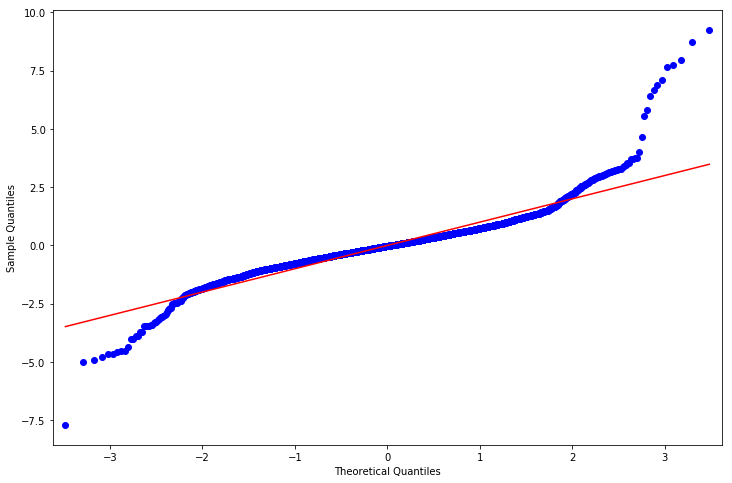

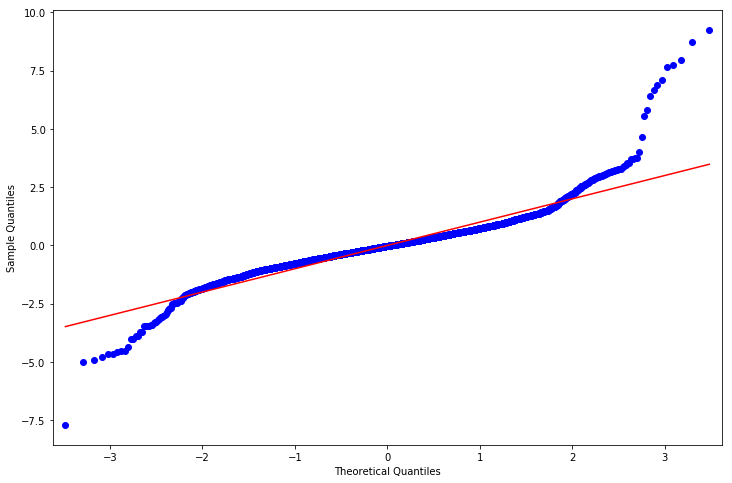

In [54]:
from scipy import stats
from statsmodels.graphics.api import qqplot

# Printing the Normal Test results to check whether residuals come from a normal distribution
resid = results.resid
print(stats.normaltest(resid))

# Contructing qq-plot of residuals 
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
qqplot(resid, line='s', ax=ax, fit=True)

P-Value close to 0 suggests that the residuals are normally distributed. 